<a href="https://colab.research.google.com/github/VincentLohYongSheng-2025/data-science-VLYS/blob/main/DataPreprocessingW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/salary.csv') #load the csv dataset into a 'dataframe' df



Mounted at /content/drive


In [3]:
df = df.rename(columns={
    'Unnamed: 0': 'UserID',
    'Timestamp': 'timestamp',
    'How old are you?': 'age',
    'What industry do you work in?': 'industry',
    'Job title': 'job_title',
    'If your job title needs additional context, please clarify here:': 'job_context',
    "What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)": 'Salary',
    "How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.": 'compensation',
    'Please indicate the currency': 'currency',
    'If "Other," please indicate the currency here: ': 'other_currency',
    'If your income needs additional context, please provide it here:': 'income_context',
    'What country do you work in?': 'country',
    "If you're in the U.S., what state do you work in?": 'state',
    'What city do you work in?': 'city',
    'How many years of professional work experience do you have overall?': 'exp_total',
    'How many years of professional work experience do you have in your field?': 'exp_field',
    'What is your highest level of education completed?': 'education',
    'What is your gender?': 'gender',
    'What is your race? (Choose all that apply.)': 'race'
})

# ✅ Confirm the new column names
print(df.columns)

# (Optional) Save the cleaned version
df.to_csv("salary_cleaned.csv", index=False)

Index(['UserID', 'timestamp', 'age', 'industry', 'job_title', 'job_context',
       'Salary', 'compensation', 'currency', 'other_currency',
       'income_context', 'country', 'state', 'city', 'exp_total', 'exp_field',
       'education', 'gender', 'race'],
      dtype='object')


In [4]:
#Convert "salary" string to integers
df['Salary'] = df['Salary'].replace(',','',regex=True) #this replace the comma ',' in 55,000 to 55000
df['Salary'] = df['Salary'].astype(int) # this convert the column datatypes from object into numbers , in this case integer

df.head()



,UserID,timestamp,age,industry,job_title,job_context,Salary,compensation,currency,other_currency,income_context,country,state,city,exp_total,exp_field,education,gender,race
0,0,2021-04-27 11:02:09.743,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,1,2021-04-27 11:02:21.562,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600,4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,2,2021-04-27 11:02:38.125,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,3,2021-04-27 11:02:40.643,25-34,Nonprofits,Program Manager,NaN,62000,3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4,2021-04-27 11:02:41.793,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


In [5]:
# Use df.info to identify which columns has a lot of missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28180 entries, 0 to 28179
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UserID          28180 non-null  int64  
 1   timestamp       28180 non-null  object 
 2   age             28180 non-null  object 
 3   industry        28099 non-null  object 
 4   job_title       28178 non-null  object 
 5   job_context     7284 non-null   object 
 6   Salary          28180 non-null  int64  
 7   compensation    20824 non-null  float64
 8   currency        28180 non-null  object 
 9   other_currency  217 non-null    object 
 10  income_context  3050 non-null   object 
 11  country         28180 non-null  object 
 12  state           23124 non-null  object 
 13  city            28098 non-null  object 
 14  exp_total       28180 non-null  object 
 15  exp_field       28180 non-null  object 
 16  education       27944 non-null  object 
 17  gender          27998 non-null 

In [6]:
# Write a function that returns the each column name with the number of missing values.
# Guide isna().sum()

print("Nummber of rows missing in'Compensation':", df['compensation'].isna().sum())



Nummber of rows missing in'Compensation': 7356


In [7]:
# Write a function that returns the each column name with the number of missing values.
# Guide isna().sum()

print('--Columns and the number of missing values--')
for column_name, n_missing in df.isna().sum().items():
    print(f'{column_name} : {n_missing}')


--Columns and the number of missing values--
UserID : 0
timestamp : 0
age : 0
industry : 81
job_title : 2
job_context : 20896
Salary : 0
compensation : 7356
currency : 0
other_currency : 27963
income_context : 25130
country : 0
state : 5056
city : 82
exp_total : 0
exp_field : 0
education : 236
gender : 182
race : 190


In [8]:
#Drop columns 'Context', 'Other currency', 'Salary context'

# Guide: df.drop()
to_drop = [a for a in ['job_context', 'other_currency', 'income_context'] if a in df.columns]
if to_drop:
    df = df.drop(columns=to_drop)

# Check using df.head()
df.head()

,UserID,timestamp,age,industry,job_title,Salary,compensation,currency,country,state,city,exp_total,exp_field,education,gender,race
0,0,2021-04-27 11:02:09.743,25-34,Education (Higher Education),Research and Instruction Librarian,55000,0.0,USD,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,1,2021-04-27 11:02:21.562,25-34,Computing or Tech,Change & Internal Communications Manager,54600,4000.0,GBP,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,2,2021-04-27 11:02:38.125,25-34,"Accounting, Banking & Finance",Marketing Specialist,34000,NaN,USD,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,3,2021-04-27 11:02:40.643,25-34,Nonprofits,Program Manager,62000,3000.0,USD,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4,2021-04-27 11:02:41.793,25-34,"Accounting, Banking & Finance",Accounting Manager,60000,7000.0,USD,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


In [9]:
# Compare the number of rows before and after dropna()


rows_before = df.shape[0]
dropna_all = df.dropna() #drop any rows even with one missing values
rows_after = dropna_all.shape[0]
print(f"Rows before dropna(): {rows_before}, after dropna(): {rows_after}")

# dropna(thresh=2) it will drop rows that has more than 2 missing values
dropna_thresh = df.dropna(thresh=3)
print("Rows after dropna(thresh=3):", dropna_thresh.shape[0])

# dropna(how=all) it will drop only rows where all values are missing
df_dropna_allrows = df.dropna(how='all')
print("Rows after dropna(how='all'):", df_dropna_allrows.shape[0])



Rows before dropna(): 28180, after dropna(): 17041
Rows after dropna(thresh=3): 28180
Rows after dropna(how='all'): 28180


In [10]:
#1.4 Impute missing values with most frequent

from sklearn.impute import SimpleImputer

# Example: Impute numeric columns with median, categorical with most frequent (following PDF's SimpleImputer hint)
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# Numeric imputer (median)
if num_cols:
    num_imputer = SimpleImputer(strategy='median')
    df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Categorical imputer (most frequent)
if cat_cols:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

# Show missing after imputation
print(df.isna().sum())

UserID          0
timestamp       0
age             0
industry        0
job_title       0
Salary          0
compensation    0
currency        0
country         0
state           0
city            0
exp_total       0
exp_field       0
education       0
gender          0
race            0
dtype: int64


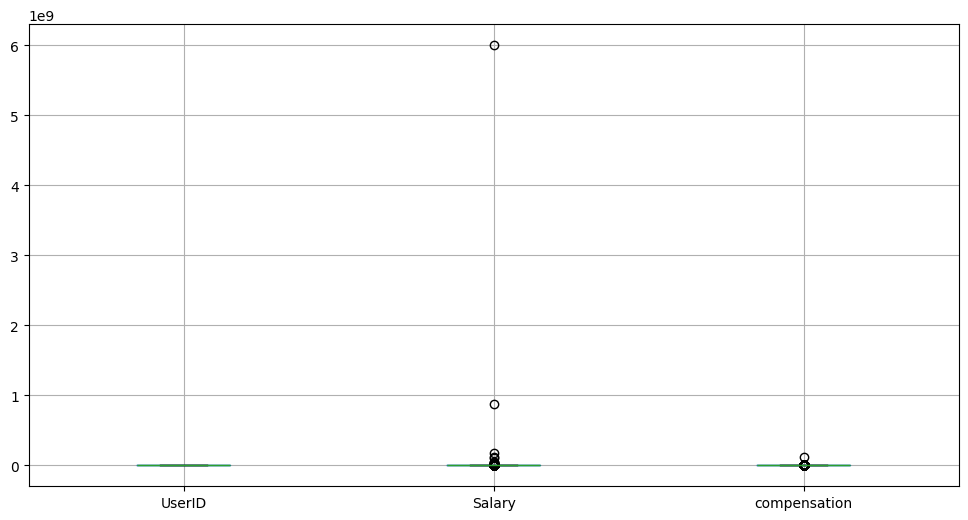

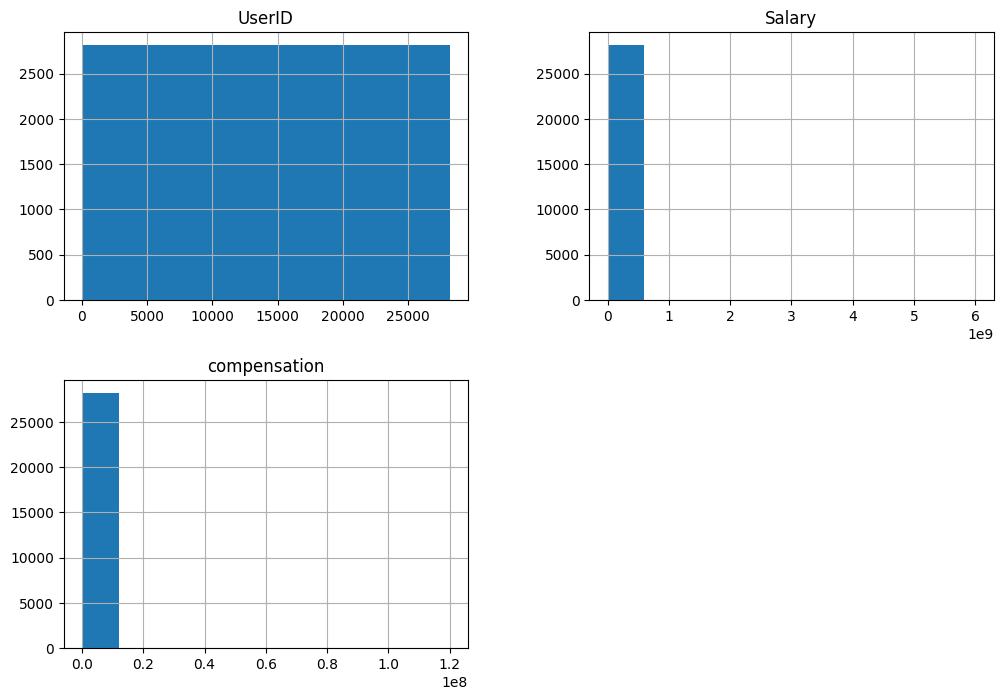

In [11]:
# Use boxplot or histograms to find outliers
import matplotlib.pyplot as plt

# boxplot for numeric columns
df.select_dtypes(include=['int64','float64']).boxplot(figsize=(12,6))
plt.show()

# or histograms
df.select_dtypes(include=['int64','float64']).hist(figsize=(12,8))
plt.show()

In [12]:
from scipy import stats
import numpy as np

# Example: remove outliers using z-score for a numeric column named 'Salary'
if 'Salary' in df.columns:
    col = 'Salary'
    z = np.abs(stats.zscore(df[col].astype(float), nan_policy='omit'))
    mask = (z < 3) | np.isnan(z)  # keep rows with |z| < 3 or NaN z
    print(f"Removing {(~mask).sum()} outliers from column '{col}' by |z|>3")
    df = df[mask].copy()
else:
    print("'Salary' column not found; choose a numeric column to apply outlier removal.")

# Use df.describe()
df.describe()


Removing 4 outliers from column 'Salary' by |z|>3


,UserID,Salary,compensation
count,28176.000000,2.817600e+04,2.817600e+04
mean,14088.433951,1.087880e+05,9.736823e+03
std,8134.677951,8.556404e+05,4.348876e+04
min,0.000000,0.000000e+00,0.000000e+00
25%,7043.750000,5.400000e+04,0.000000e+00
50%,14088.500000,7.500000e+04,2.000000e+03
75%,21133.250000,1.092445e+05,5.000000e+03
max,28179.000000,1.020000e+08,2.000000e+06


In [18]:
!pip install fuzzywuzzy python-Levenshtein
from fuzzywuzzy import process

print(df.describe(include='all'))


# Example: select rows where a numeric column is > threshold (replace 'col_name' with actual column)
# df[df['col_name'] > threshold ]

# Detect duplicates
dupes = df.duplicated().sum()
print("\nDuplicate rows:", dupes)

# Show duplicate rows
if dupes > 0:
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head(10))



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.3/153.3 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 54.8 MB/s eta 0:00:00
              UserID                timestamp    age           industry  \
count   28176.000000                    28176  28176              28176   
unique           NaN                    28171      7               1224   
top              NaN  2021-05-01 13:05:50.379  25-34  Computing or Tech   
freq             NaN                        2  12693               4800   
mean    14088.433951                      NaN    NaN                NaN   
std      8134.677951                      NaN    NaN                NaN   
min         0.000000                      NaN    NaN                NaN   
25%      7043.750000                      NaN    NaN                NaN   
50%     14088.500000                      NaN    NaN                NaN   
75%     21133.250000                      NaN    NaN                NaN   
max     28179.0000

In [22]:
print('--Columns and their number of unique items--')
for col in df.columns:
    try:
        n_unique = df[col].nunique(dropna=True)
        print(f'{col} : {n_unique}')
    except Exception as e:
        print(col, "error:", e)

# Check unique items for 'gender'
if 'gender' in df.columns:
    print("\nUnique items in 'gender':", df['gender'].unique())
else:
    print("'gender' column not found; check dataset for correct column name.")

# Example replacement to remove redundancy using df.replace()
# Grouping 'Other or prefer not to answer' and 'Prefer not to answer' into 'Other')
if 'gender' in df.columns:
    df['gender'] = df['gender'].replace({
        'Other or prefer not to answer': 'Other',
        'Prefer not to answer': 'Other'
    })
    print("\nAfter replacement, unique items in 'gender':", df['gender'].unique())


--Columns and their number of unique items--
UserID : 28176
timestamp : 28171
age : 7
industry : 1224
job_title : 14413
Salary : 3671
compensation : 848
currency : 11
country : 387
state : 137
city : 4862
exp_total : 8
exp_field : 8
education : 6
gender : 4
race : 52

Unique items in 'gender': ['Woman' 'Non-binary' 'Man' 'Other']

After replacement, unique items in 'gender': ['Woman' 'Non-binary' 'Man' 'Other']
